In [1]:
# 🧠 Step 1: Importa librerie
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 📦 Importa il tuo modulo personale
from trbxai.explain.shapset_explainer import (
    get_shap_values,
    plot_interaction_summary,
    plot_shap_boxplot,
    generate_narrative_report
)

In [2]:
# 🧠 Step 2: Crea un dataset finto semplice (1000 righe, 6 variabili)
X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

feature_names = ['step_variability', 'gait_speed', 'stride_length',
                 'ml_stability', 'fall_risk', 'ap_range']

X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='target')

In [3]:
# 🧠 Step 3: Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 🧠 Step 4: Allena modello XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:13:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [5]:
# 🧠 Step 5: Calcola valori SHAP e dataframe
shap_df, shap_vals, explainer = get_shap_values(model, X_test)
shap_df.head()

,importance,range
feature,,
step_variability,0.534199,-2.11 → 3.09
gait_speed,2.087213,-3.61 → 3.57
stride_length,0.416329,-2.10 → 2.84
ml_stability,1.219879,-3.79 → 5.09
fall_risk,1.005409,-4.84 → 3.20


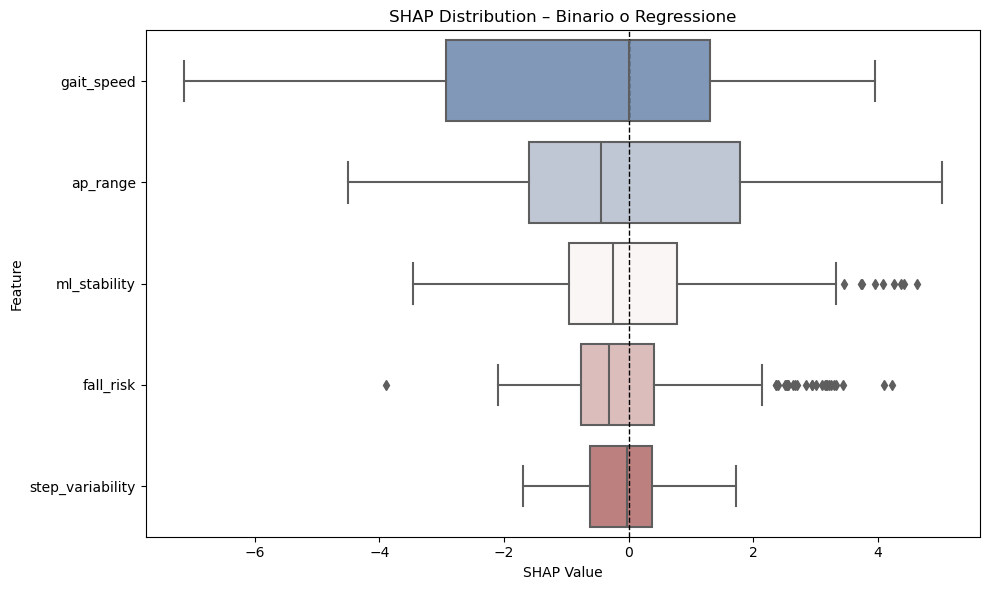

In [6]:
# 🧠 Step 6: Visualizza grafico boxplot SHAP per le top feature
plot_shap_boxplot(shap_vals, X_test, top_n=5)


<Figure size 640x480 with 0 Axes>

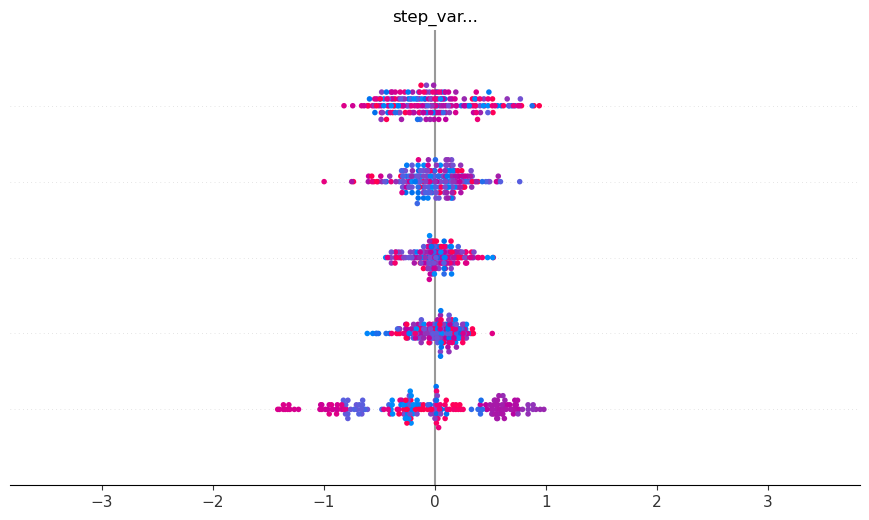

In [7]:
# 🧠 Step 7: Visualizza interazioni SHAP tra feature
plot_interaction_summary(model, X_test, max_display=5)


In [8]:
# 🧠 Step 8: Genera commenti in linguaggio medico-narrativo
commenti = generate_narrative_report(shap_df, class_name="la caduta")
for c in commenti:
    print(c)


📌 La variabile 'step_variability' con range osservato -2.11 → 3.09 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
📌 La variabile 'gait_speed' con range osservato -3.61 → 3.57 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
📌 La variabile 'stride_length' con range osservato -2.10 → 2.84 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
📌 La variabile 'ml_stability' con range osservato -3.79 → 5.09 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
📌 La variabile 'fall_risk' con range osservato -4.84 → 3.20 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
📌 La variabile 'ap_range' con range osservato -3.31 → 3.71 contribuisce fortemente alla previsione di la caduta secondo il modello SHAP.
